[0.14288412 0.20426802 0.26311675 ... 0.         0.         0.        ]
0 1000


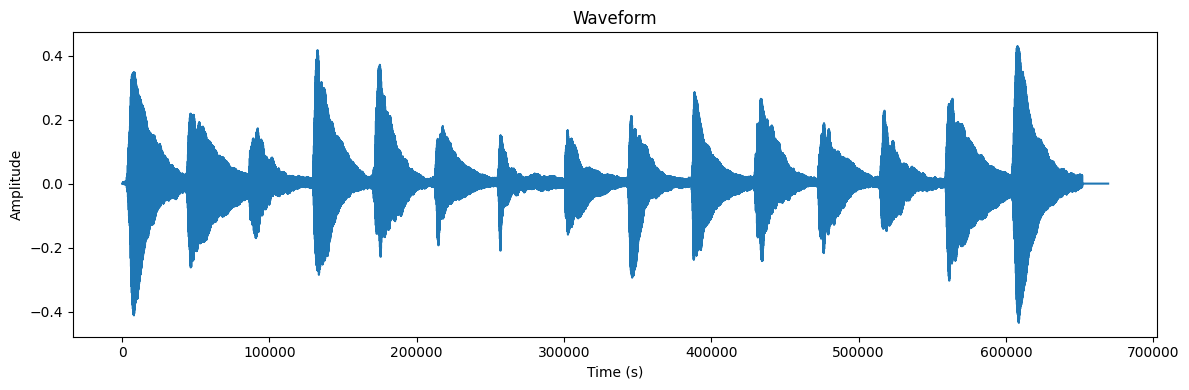

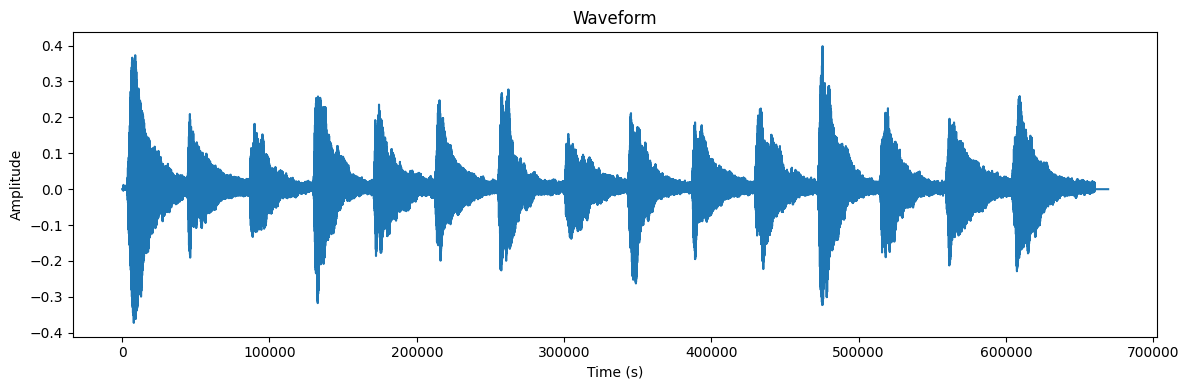

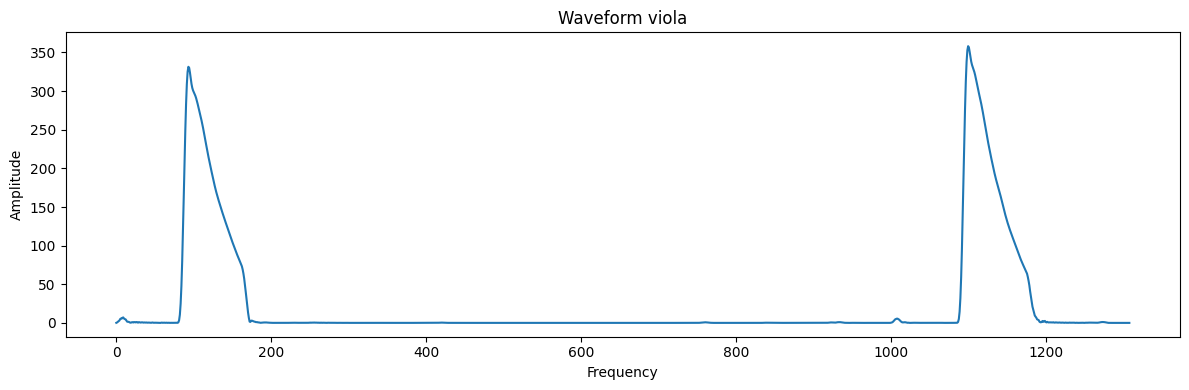

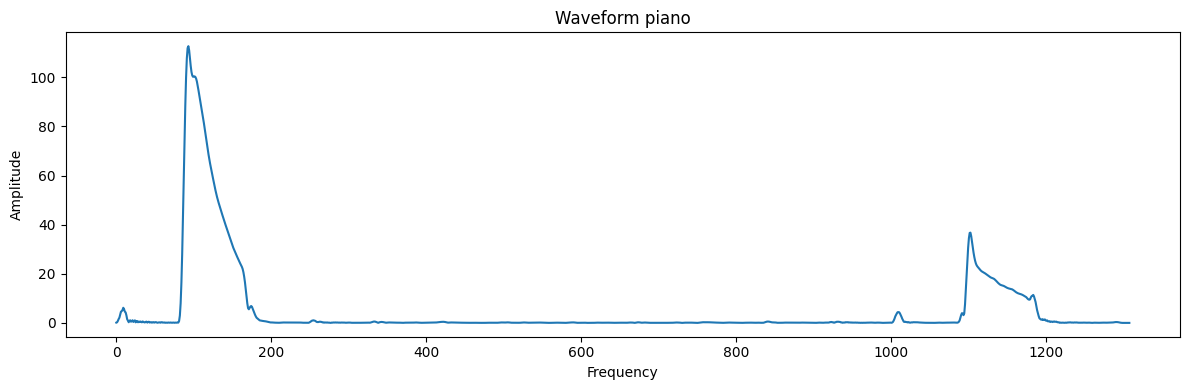

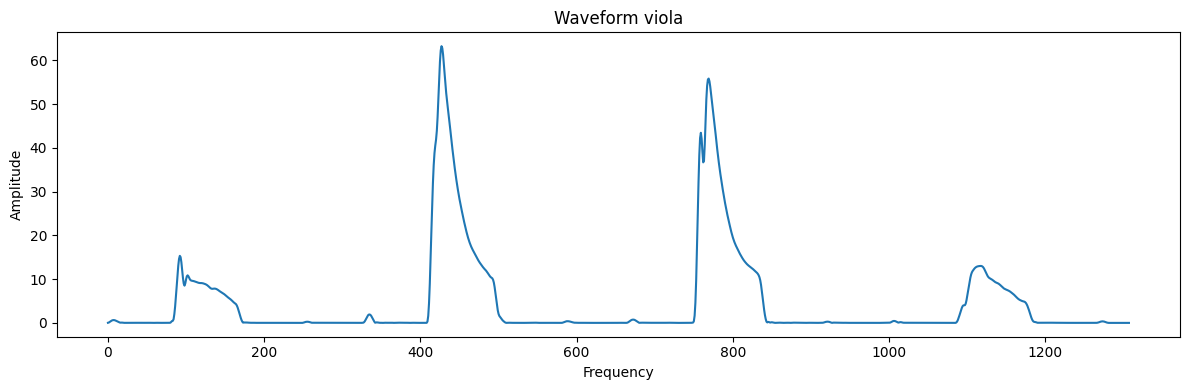

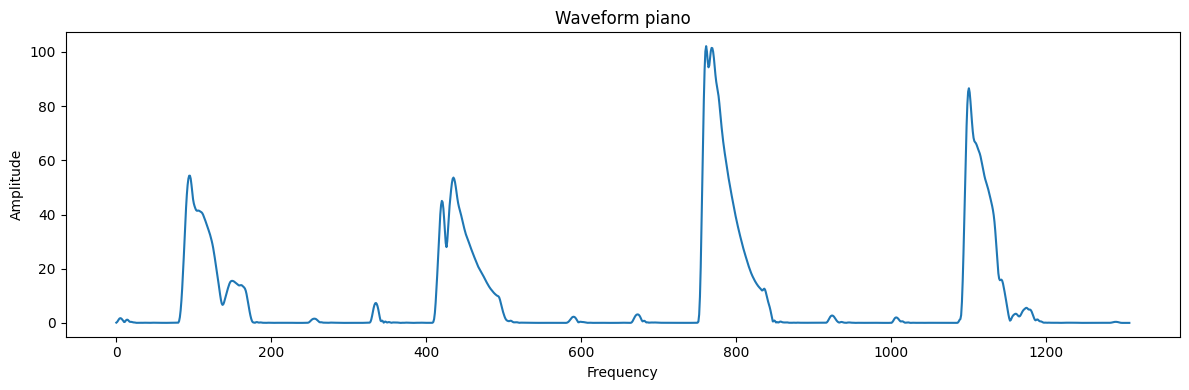

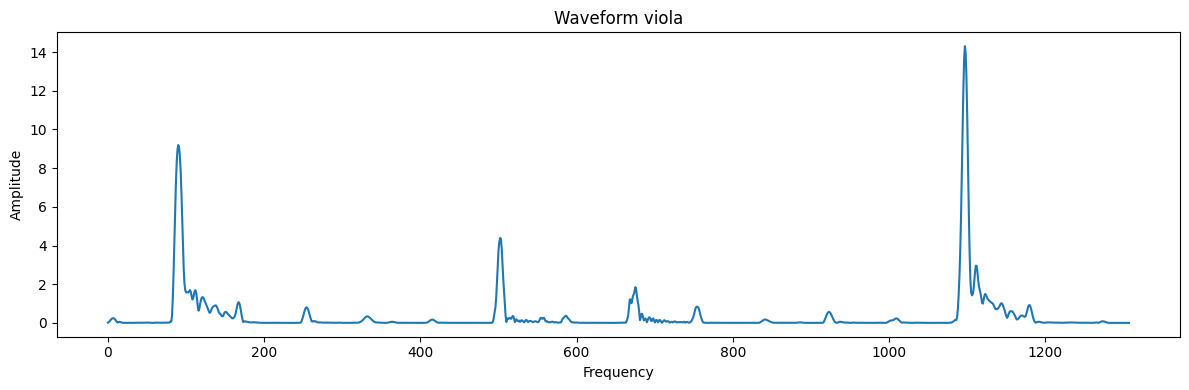

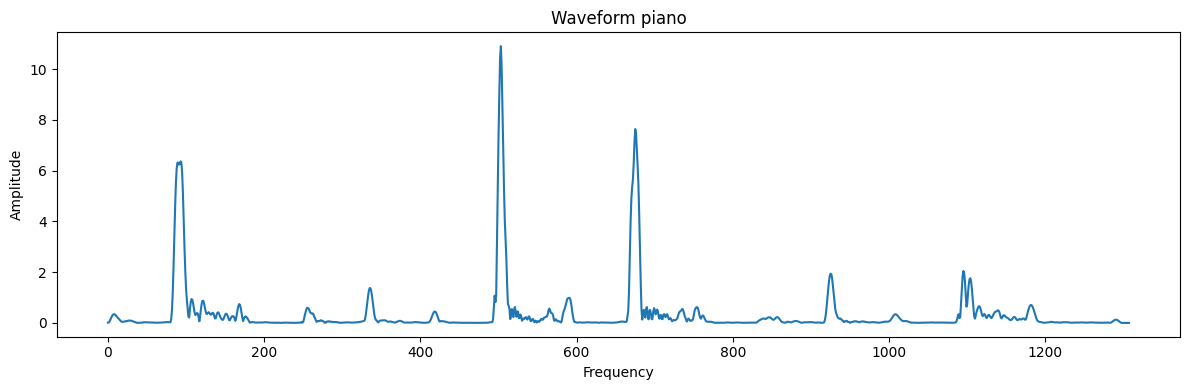

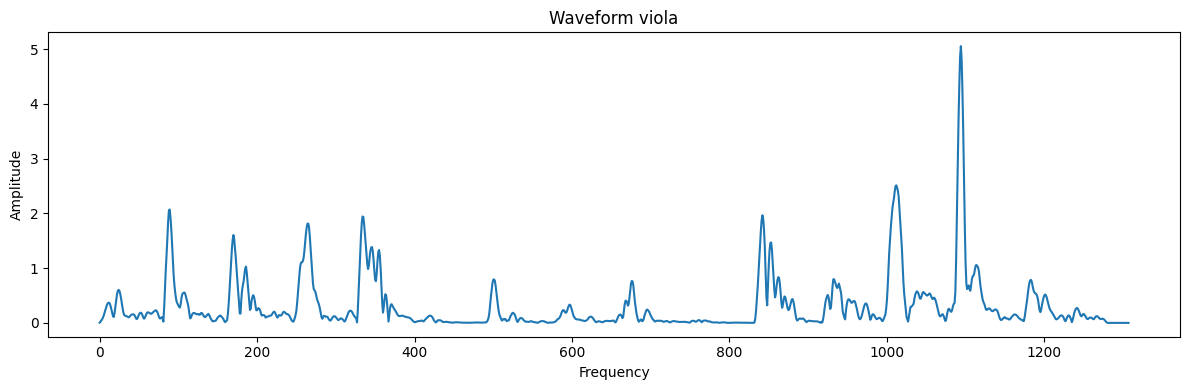

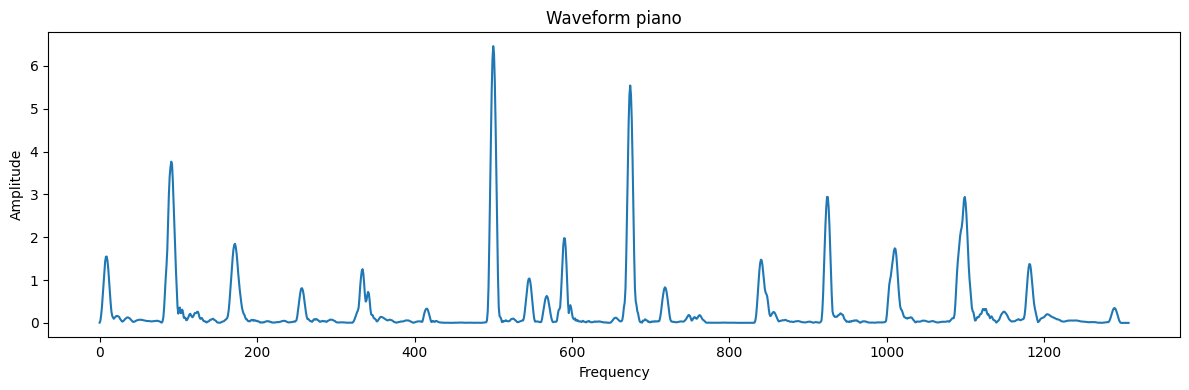

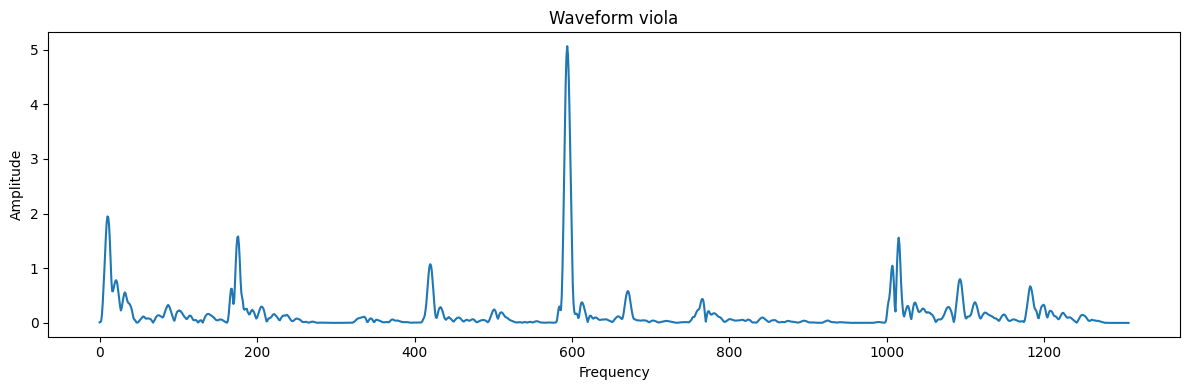

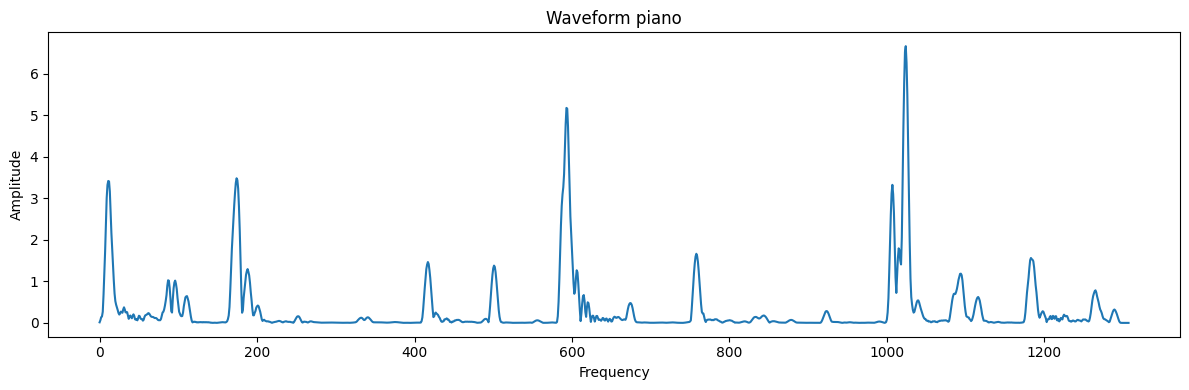

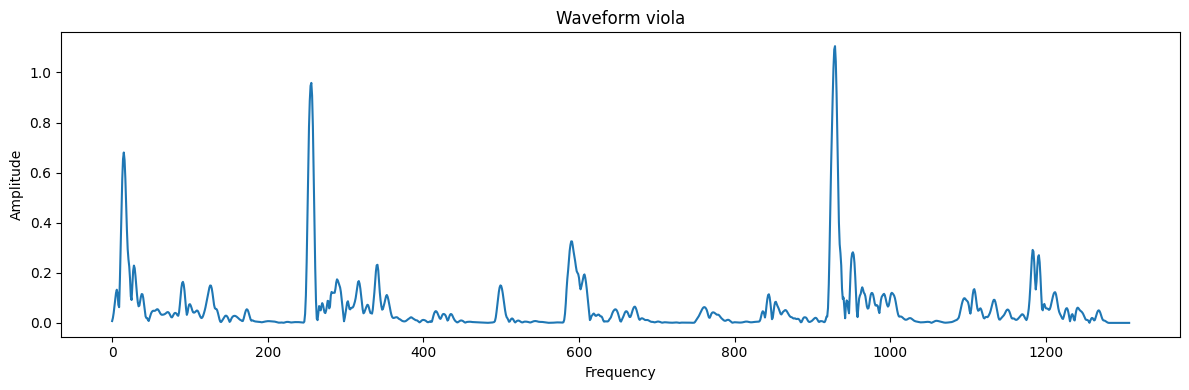

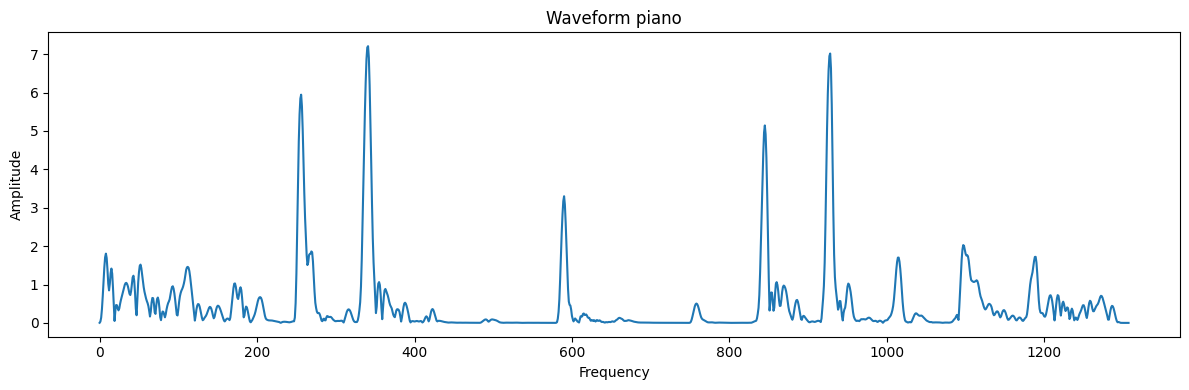

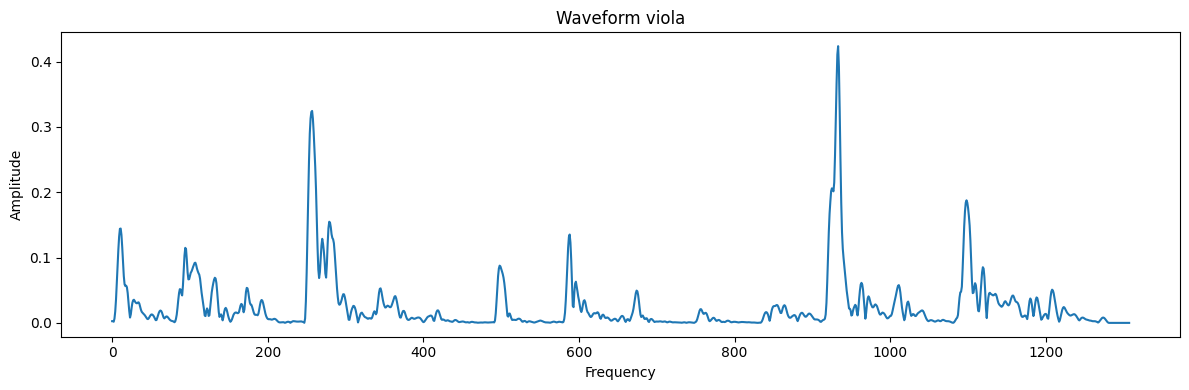

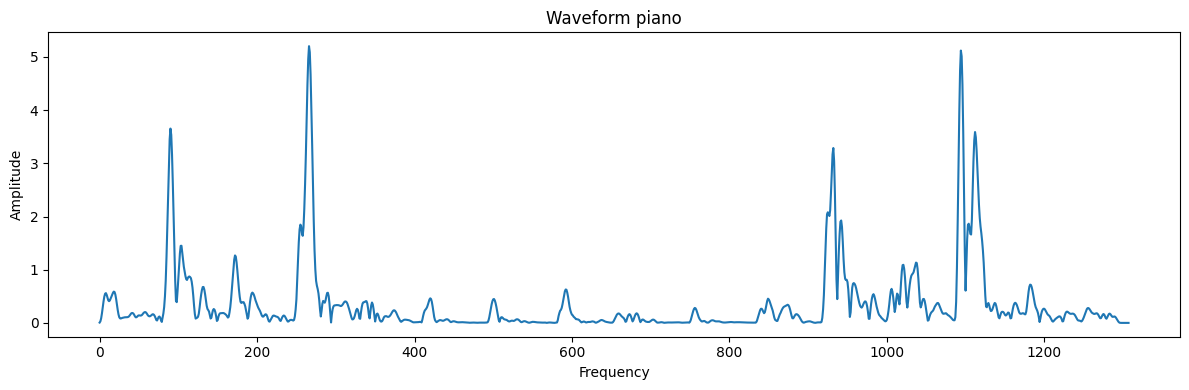

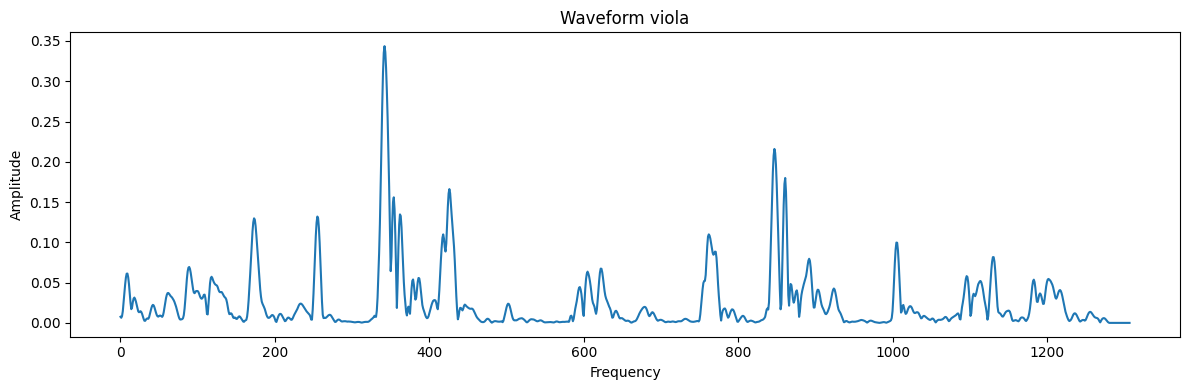

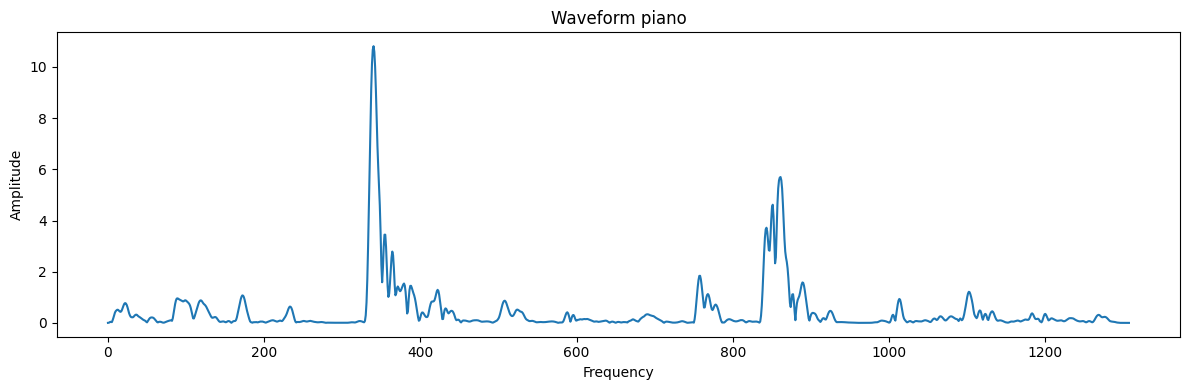

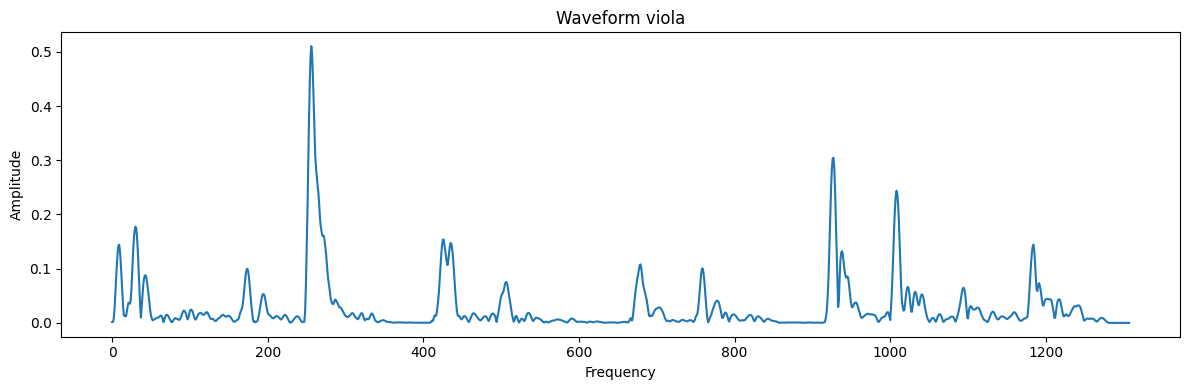

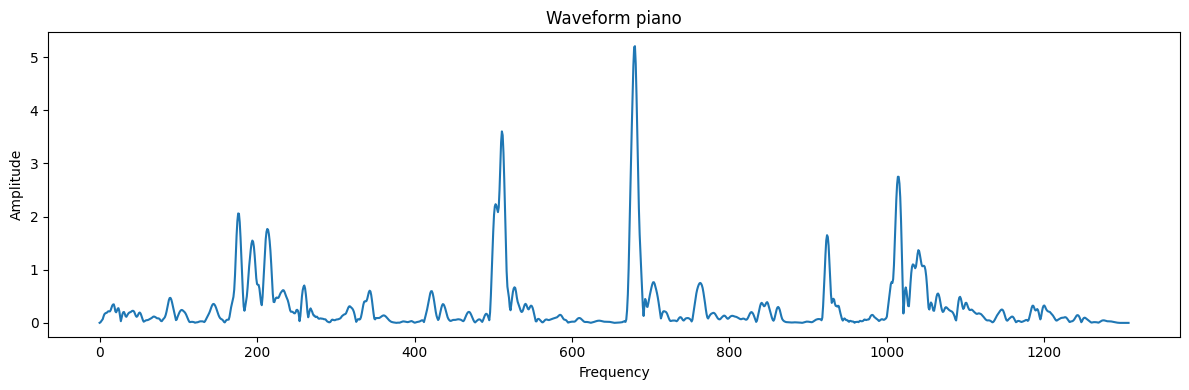

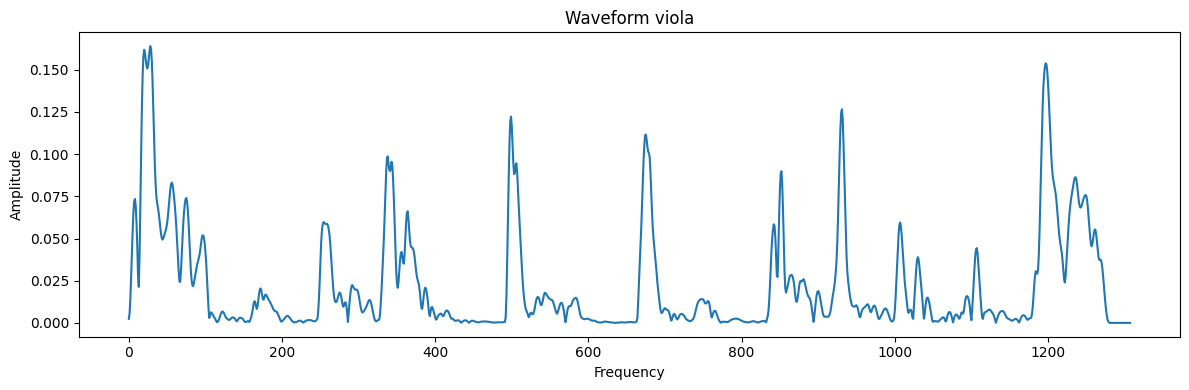

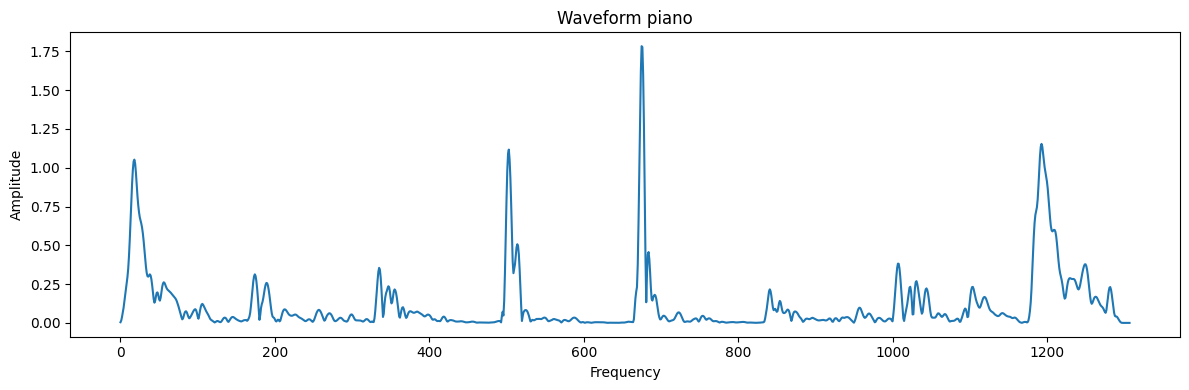

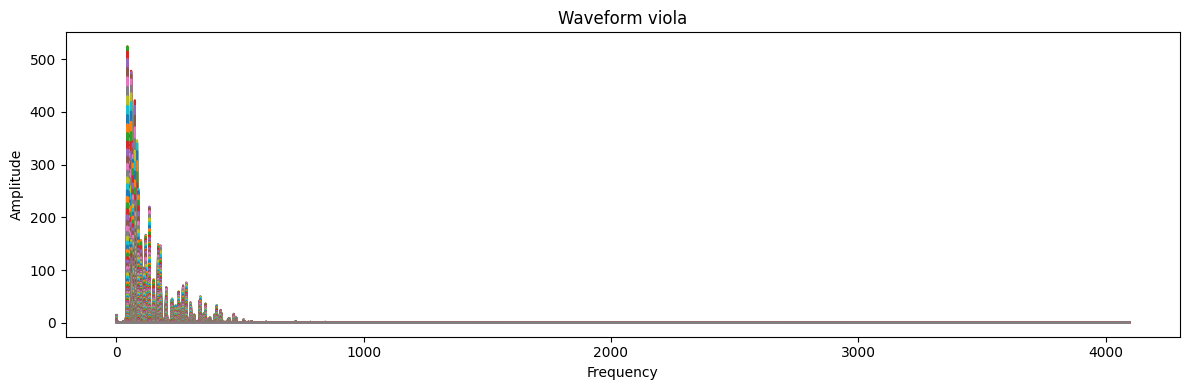

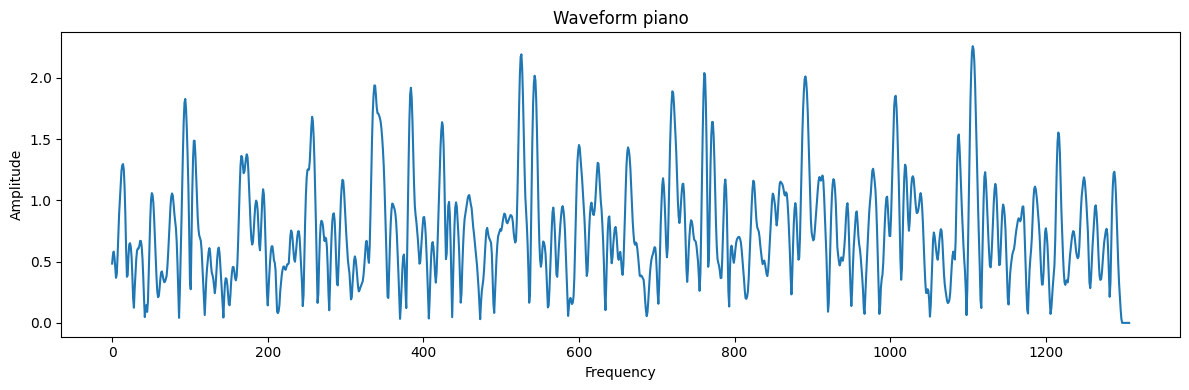

C:\Users\garyhu\AppData\Local\Temp\ipykernel_9932\3224651198.py:109: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


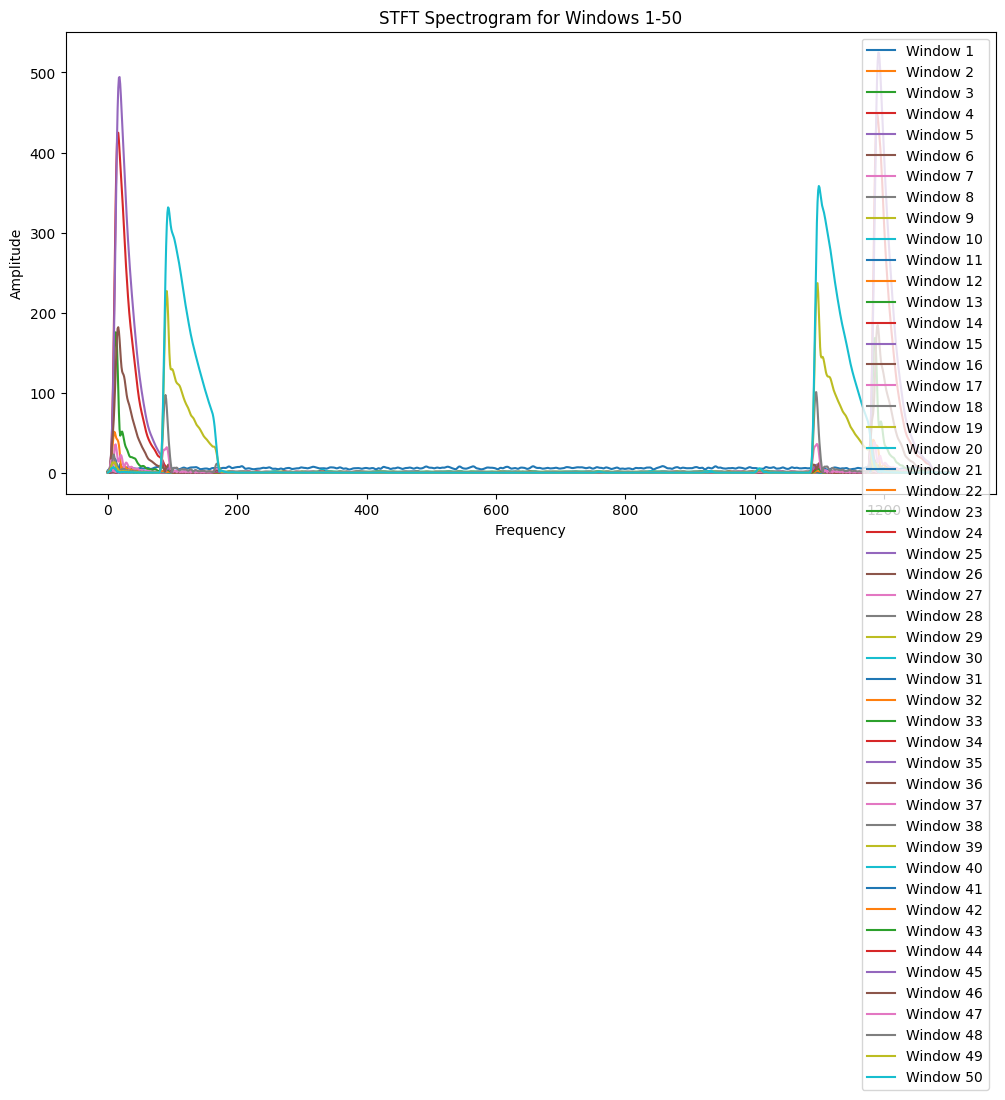

C:\Users\garyhu\AppData\Local\Temp\ipykernel_9932\3224651198.py:130: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


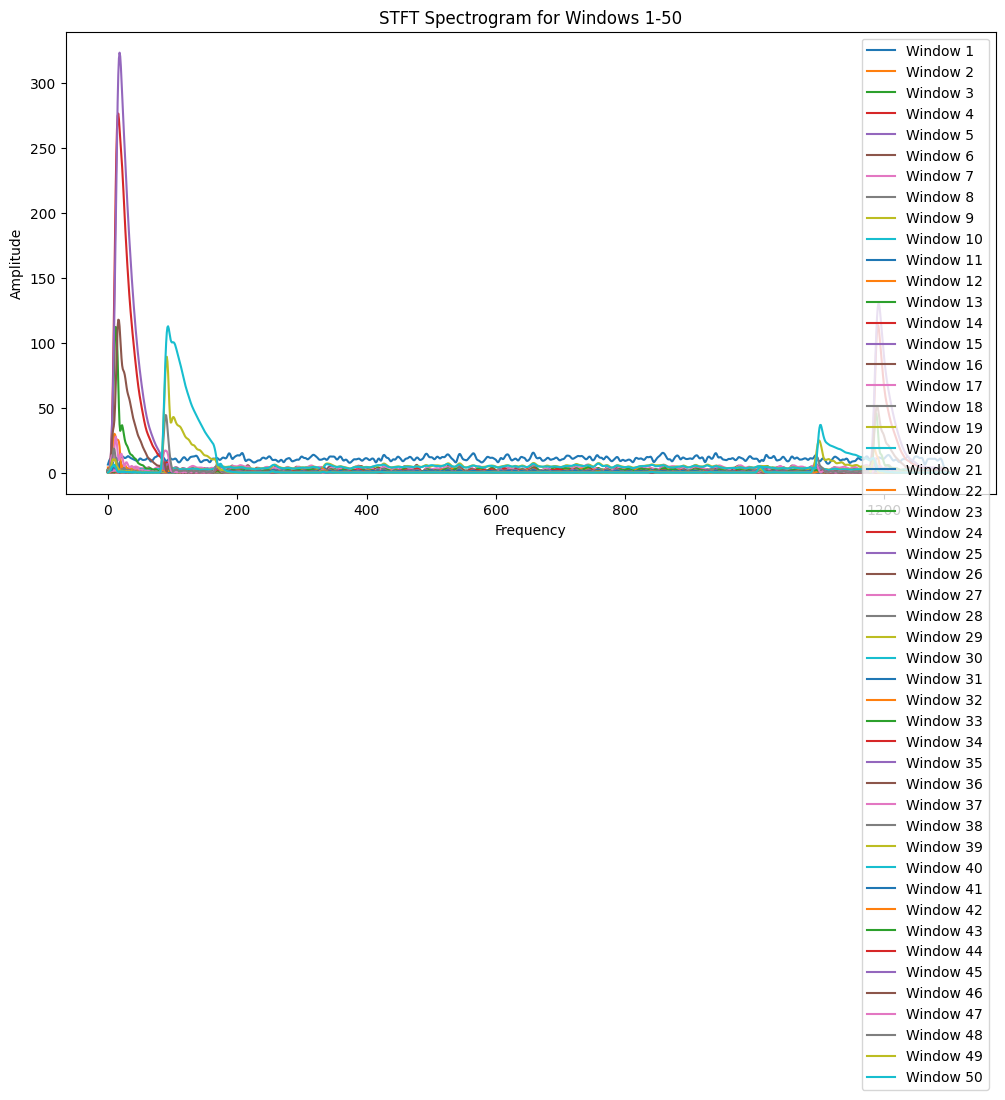

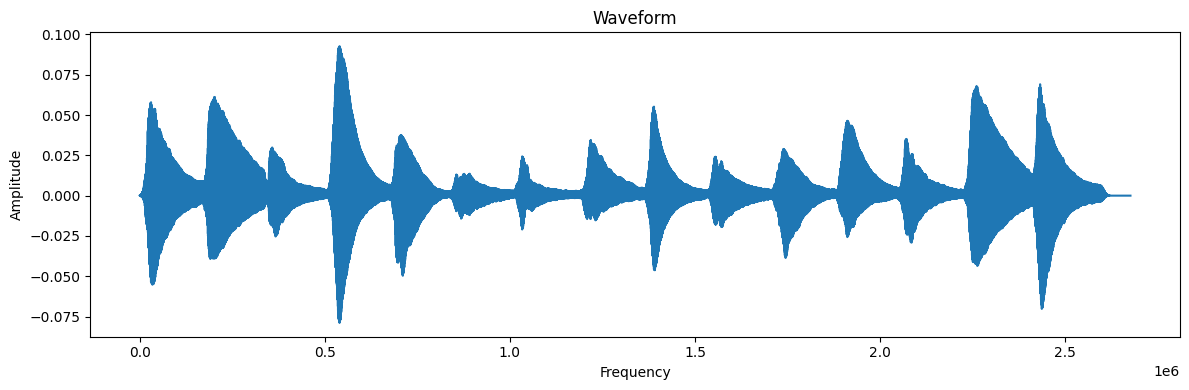

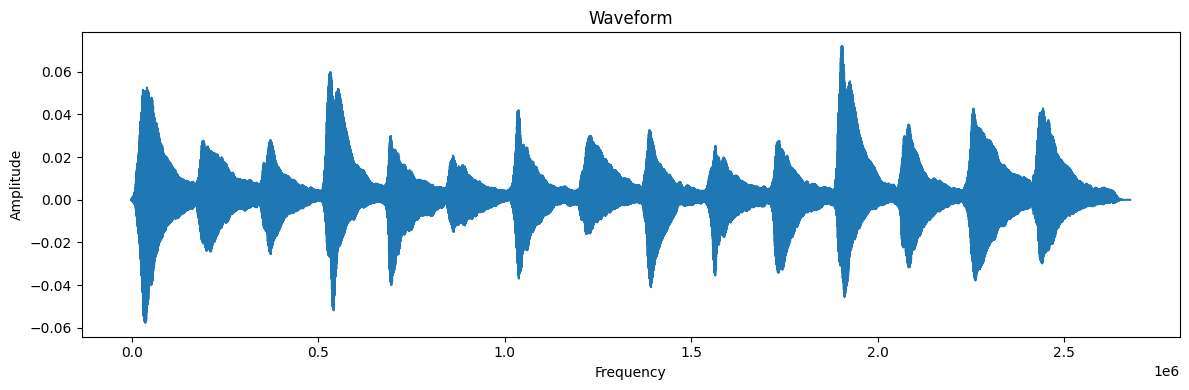

In [12]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
n=50
# 同一首歌不同種樂器
filename1 = r"C:\Users\garyhu\Desktop\圓潤audio.wav"
filename2 = r"C:\Users\garyhu\Desktop\尖銳audio.wav"
# 設定要提取的特定頻率範圍
target_frequency = (0, 1000)  # 包括中央C的頻率範圍

# 載入音頻檔案
audio1, sr1 = librosa.load(filename1, sr=None)
audio2, sr2 = librosa.load(filename2, sr=None)

# 執行短時傅立葉變換
stft1 = np.abs(librosa.stft(audio1, hop_length=512, n_fft=2048 * 4))
stft2 = np.abs(librosa.stft(audio2, hop_length=512, n_fft=2048 * 4))
print(stft1[10])
frequencies1 = librosa.core.fft_frequencies(n_fft=2048*4)  # 取得頻率陣列
frequencies2 = librosa.core.fft_frequencies(n_fft=2048*4) 

# 將目標頻率範圍之外的頻率分量置零
start_index1 = np.argmax(frequencies1 >= target_frequency[0])
end_index1 = np.argmax(frequencies1 > target_frequency[1])

start_index2 = np.argmax(frequencies2 >= target_frequency[0])
end_index2 = np.argmax(frequencies2 > target_frequency[1])
print(start_index2,target_frequency[1])

# 執行逆短時傅立葉變換，得到特定頻率的波形
filtered_audio1 = librosa.istft(stft1)
filtered_audio2 = librosa.istft(stft2)

# 劃出原始音樂的波型(樂器1)
plt.figure(figsize=(12, 4))
plt.plot(audio1)  # 繪製提取的波形
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.tight_layout()
plt.show()


# 劃出原始音樂的波型(樂器2)
plt.figure(figsize=(12, 4))
plt.plot(audio2)  # 繪製提取的波形
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.tight_layout()
plt.show()

for i in range(10):
# 劃出轉換後的波型
# N個頻率並排顯示來方便比較樂器的音色差別
    plt.figure(figsize=(12, 4))
    plt.plot(stft1[n])  # 繪製提取的波形
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")
    plt.title("Waveform viola")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 4))
    plt.plot(stft2[n])  # 繪製提取的波形
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")
    plt.title("Waveform piano")
    plt.tight_layout()
    plt.show()
    n+=100

plt.figure(figsize=(12, 4))
plt.plot(stft1)  # 繪製提取的波形
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Waveform viola")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(stft2[10])  # 繪製提取的波形
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Waveform piano")
plt.tight_layout()
plt.show()

# 設定要顯示的時間窗口範圍
window_range = range(1, 51)  # 從第1個到第50個時間窗口

# 設定繪圖的大小
plt.figure(figsize=(12, 6))

# 迴圈遍歷每個時間窗口，並繪製對應的頻譜
for window_index in window_range:
    plt.plot(stft1[window_index], label=f"Window {window_index}")

# 添加圖例
plt.legend()

# 添加標籤和標題
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("STFT Spectrogram for Windows 1-50")

# 顯示圖形
plt.tight_layout()
plt.show()

window_range = range(1, 51)  # 從第1個到第50個時間窗口

# 設定繪圖的大小
plt.figure(figsize=(12, 6))

# 迴圈遍歷每個時間窗口，並繪製對應的頻譜
for window_index in window_range:
    plt.plot(stft2[window_index], label=f"Window {window_index}")

# 添加圖例
plt.legend()

# 添加標籤和標題
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("STFT Spectrogram for Windows 1-50")

# 顯示圖形
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(filtered_audio1)  # 繪製提取的波形
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(filtered_audio2)  # 繪製提取的波形
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.tight_layout()
plt.show()

#Audio(filename=filtered_audio1,rate=44100)